# Lecture 2: The garden of forking data


# Personal notes

- Bayesian data analysis
  - for each possible explaination of the sample, count number of ways that explaination could happen
  - if an explaination happens more often, it is more plausible
- For the globe toss, For each possible proportion of water possible (we want to estimate this, ir, this is our estimand), figure out number of ways that could happen, and report as the result the probability distribution across all possibilities. Proportions that have more ways to produce the sample we observed are more likely. Here, we discritise the proportions for the example
- Testing is super important ! you want to test the generative model as well as the estimator together. test on extreme settings

## plain language summary (by me)

We go through a complete "bayesian owl", ie, a bayesian modelling workflow in this lecture. We play with a toy problem of estimating the percentage of water on the globe, given that all we have is a fixed number of observational data of if a random point on the globe is land or water. We want to update our beliefs when new observational data is encountered. The core of bayesian data analysis can be thought of as : for each explaination of the data possible(eg: each proportion of water possible), see how many ways the observed samples could happen. If an explaination (a sample water proportion) makes the observed samples more likely, that explaination is more plausible. In this way, we get a probability for each explaination (the posterior), which we can plot and get information on : if we get this samples, what is the probability distribution of explainations that can cause this observed data. In the specific example of this lecture, we start with defining the estimand : the proportion of water. We create a DAG, the causal model relating to the samples (this is important. for example, if there is measurement error in the samples, these would be part of the DAG). We make a generative model, that takes in the water proportion and simulates "N" samples. Then, we have a model that is basically an equation that gives us the estimated posterior distribution (of the water probability), based on proportion of counts in each scenario. We thus have generative model for synthetic data -> bayesian model (bec estimate of estimand is a distribution) that gives a distribution of what it thinks is the answer. Again, in this probability distribution of the water (posterior distribution), we assign higher probability to those percentages that allow the observation to be more likely given the total possibilities that that percentage allows.

In the discreet case, we have proportions of counts as the bayesian estimator, but in the continuous case, this is a product of probabilities divided by a normalising constant (some complex factorials), called a "beta" distribution. Also, the probability is called "density" in the continuous case. Once we have tested the generative and statistical model together, we can now do further analysis. The example in the lecture is of a forecast (but many other analyses are possible). The forecast is of what the next 10 samples might be given the current posterior. Using the posterior, we create a "posterior predictive distribution" for this purpose. For a list of p values [sampled from posterior, more probable p's sampled more often], we re-run the simulations with these p's for N=10 and see the number of W's in each. The distribution of this is the posterior predictive distribution.

The lecture ends with a few key points : we should always work with the whole posterior distribution, not intervals or some summary statistics, and there is no minimum sample size for this type of analysis, since uncertainties are represented well.

#### gaps

How the beta distribution is derived, the posterior


# AI summary

This lecture, titled "The Garden of Forking Data," focuses on building Bayesian estimators using a globe-tossing example to estimate the proportion of Earth covered by water (p). The lecture follows a five-step workflow:

1.  **Defining the generative model:** This involves identifying the variables (p, number of tosses (n), water observations (W), and land observations (L)) and understanding the causal relationships between them. The relationships are visually represented using a directed acyclic graph (DAG), which illustrates how changes in one variable influence the others.

2.  **Defining the estimand:** In this example, the estimand is the proportion of water on the globe (p).

3.  **Designing the estimator:** The core of Bayesian inference lies in counting all possible ways a sample could arise for each possible explanation. The explanations with more ways to produce the observed sample are considered more plausible. This concept is illustrated using the "Garden of Forking Data" metaphor, where each path represents a possible sequence of water and land observations.

    - By systematically counting the paths consistent with the observed sample for each possible proportion of water, we obtain the relative plausibility of each proportion. This process, called Bayesian updating, involves multiplying the existing count by the number of ways each possibility could produce a new observation.

    - To handle large numbers and make calculations manageable, counts are converted into probabilities, resulting in the posterior distribution. The posterior distribution represents the updated belief about the proportion of water after considering the observed data.

4.  **Testing the estimator:** It's crucial to test the estimator using simulations. This involves creating a function (Sim_Globe) that simulates globe tosses based on a chosen proportion of water (p) and number of tosses (n).

    - By comparing the estimator's results with the known true proportion used in the simulation, we can verify its accuracy and identify potential errors.

5.  **Summarizing the posterior distribution:** The posterior distribution, being the estimate, is analyzed in its entirety, not just through point estimates.

    - Common summaries include the **mode** (the proportion with the highest posterior probability) and the **mean** (the average proportion weighted by its posterior probability).

    - Intervals, like the 50% central percentile interval or the 89% interval, can be used to summarize the spread of the distribution, but no specific interval holds special significance.

The lecture emphasizes several key concepts of Bayesian inference:

- **No minimum sample size:** Bayesian inference allows updating with every new data point, providing an estimate at each step.
- **Posterior distribution encompasses sample size:** The shape of the posterior distribution reflects the information contained in the sample size and the specific data observed.
- **No point estimates:** The entire posterior distribution constitutes the estimate, and calculations should utilize the full distribution, not just specific points.
- **No true intervals:** Intervals merely summarize the shape of the posterior distribution, and no specific interval endpoint holds inherent meaning.

The lecture concludes with a bonus round discussing **misclassification**, where the observed data might not accurately reflect the true water and land observations due to errors. This scenario requires modifying the generative model and the estimator to account for the misclassification rate (X).

- The updated model incorporates the misclassification rate to estimate the true proportion of water despite the presence of errors. The resulting posterior distribution is wider, reflecting the added uncertainty from misclassification.

The misclassification example highlights the importance of modeling potential sources of error in data analysis, a theme that extends to other issues like missing data and non-representative samples. By explicitly modeling these factors, we can obtain more robust and reliable estimates.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# in a 4 sided globe, where entire faces are one thing, we want to estimate the proportion of water


def sim_globe(p, N):
    return np.random.choice(["W", "L"], N, p=[p, 1 - p])

In [4]:
# test on extreme settings
print(sim_globe(1, 10))
print(sum(sim_globe(0.5, 10000) == "W") / 1e4)

['W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W' 'W']
0.5022


In [5]:
# our estimator, based on the probabilities
def compute_posterior(sample, p=np.array([0, 0.25, 0.5, 0.75, 1])):
    # calc prob of the proportion of water given the sample
    # the probability that the given case (p=0.25, etc) produces the sample observed, vectorised
    # we dont want it for individual probabilities, but relative in terms of total thigs seen
    p_dist = ((4 * p) ** sum(sample == "W")) * ((4 * (1 - p)) ** sum(sample == "L"))
    p_dist = p_dist / sum(p_dist)
    return p_dist

In [6]:
def show(data, p=[0, 0.25, 0.5, 0.75, 1]):
    plt.bar(range(len(data)), data)
    plt.xticks(range(len(data)), p)

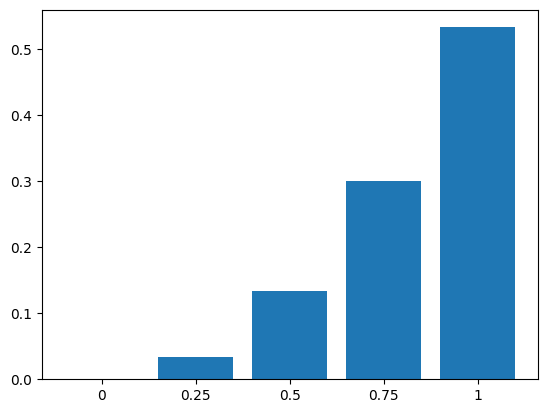

In [7]:
show(
    compute_posterior(
        sim_globe(0.75, 2),
    )
)

In [8]:
compute_posterior(np.array(list("WLWWWLWLW")))
compute_posterior(np.array(list("WLWWWLWLW")))

array([0.        , 0.02129338, 0.40378549, 0.57492114, 0.        ])

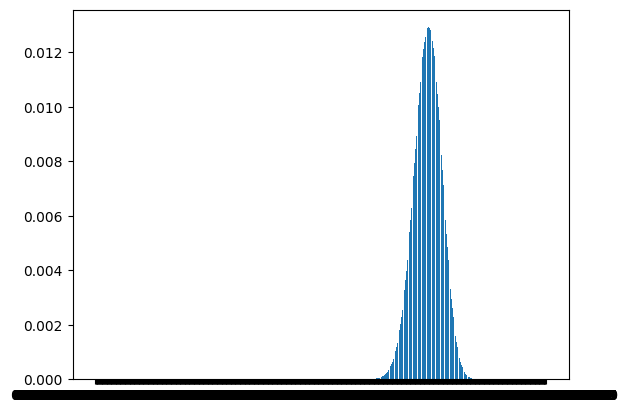

In [131]:
p = np.linspace(0, 1, 1000)
show(
    compute_posterior(sim_globe(0.75, 200), p=p),
    p=p,
)


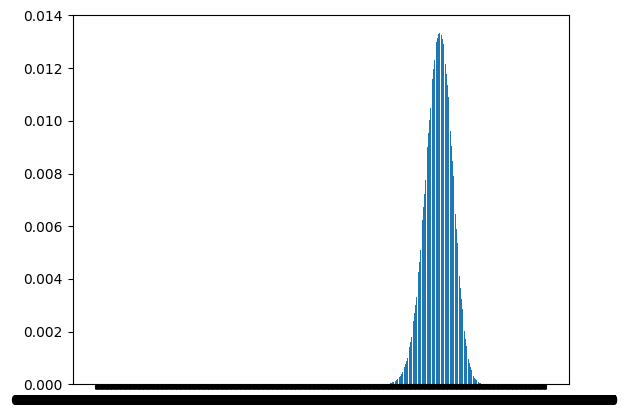

In [136]:
from scipy import stats

p = np.linspace(0, 1, 1000)
sample = sim_globe(0.75, 200)
n_water = sum(sample == "W")
n_land = sum(sample == "L")

# Beta distribution with a + 1, b + 1 for water/land counts
beta_dist = stats.beta(n_water + 1, n_land + 1)
posterior = beta_dist.pdf(p)
posterior = posterior / sum(posterior)  # Normalize

show(posterior, p=p)


## posterior predictive


(1000,)


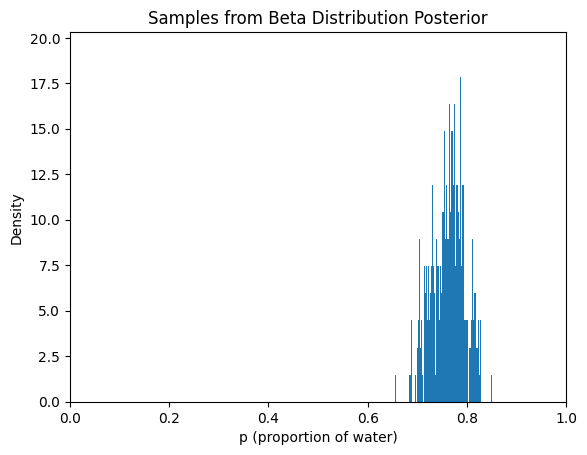

In [171]:
# Take samples from the Beta distribution
samples = beta_dist.rvs(1000)
print(samples.shape)

plt.figure()
plt.hist(samples, bins=300, density=True)
plt.xlabel("p (proportion of water)")
plt.ylabel("Density")
plt.title("Samples from Beta Distribution Posterior")
plt.xlim(0, 1)
plt.show()


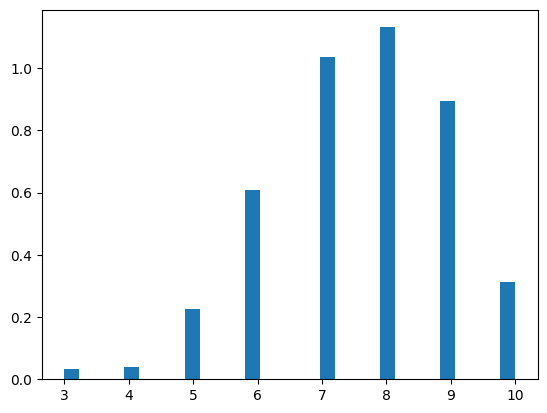

In [178]:
forecast_window = 10
num_water = []
all_sims = []
for sample_p in samples:
    out = sim_globe(sample_p, forecast_window)
    num_water.append(sum(out == "W"))
    all_sims.append(out)

plt.hist(num_water, bins=30, density=True);


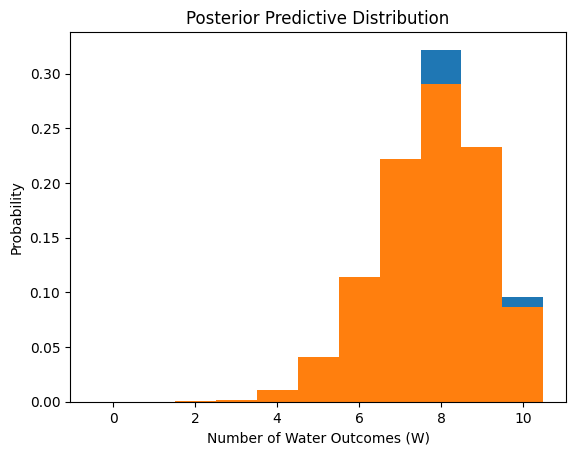

In [188]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt


def sim_globe(p, N):
    return np.random.choice(["W", "L"], N, p=[p, 1 - p])


sample = sim_globe(0.75, 200)
n_water = sum(sample == "W")
n_land = sum(sample == "L")

# Beta distribution with a + 1, b + 1 for water/land counts
beta_dist = stats.beta(n_water + 1, n_land + 1)
posterior_samples = beta_dist.rvs(1000)  # Example: Beta(6,4) posterior


# --- Predictive Distribution ---
def generate_predictive_distribution(p, forecast_window=10):
    num_water_outcomes = []
    for _ in range(1000):  # Simulate many experiments
        simulated_data = sim_globe(p, forecast_window)
        num_water = np.sum(simulated_data == "W")
        num_water_outcomes.append(num_water)
    return num_water_outcomes


# Choose a specific 'p' value from the posterior
p_value = posterior_samples[0]  # Example: Taking the first sample

# Generate and plot the predictive distribution
predictive_data = generate_predictive_distribution(p_value)
plt.figure()
plt.hist(predictive_data, bins=np.arange(forecast_window + 2) - 0.5, density=True)
plt.xlabel("Number of Water Outcomes (W)")
plt.ylabel("Probability")
plt.title(f"Predictive Distribution for p = {p_value:.2f}")
# plt.show()

# --- Posterior Predictive Distribution ---
forecast_window = 10
all_water_outcomes = []
for p in posterior_samples:
    predictive_data = generate_predictive_distribution(p, forecast_window)
    all_water_outcomes.extend(predictive_data)

# plt.figure()
plt.hist(all_water_outcomes, bins=np.arange(forecast_window + 2) - 0.5, density=True)
plt.xlabel("Number of Water Outcomes (W)")
plt.ylabel("Probability")
plt.title("Posterior Predictive Distribution")
plt.show()

# homework


In [9]:
compute_posterior(np.array(list("WWWWLLLLLLLLLLL")))

array([0.00000000e+00, 8.43573211e-01, 1.56041067e-01, 3.85721633e-04,
       0.00000000e+00])

<Axes: ylabel='Density'>

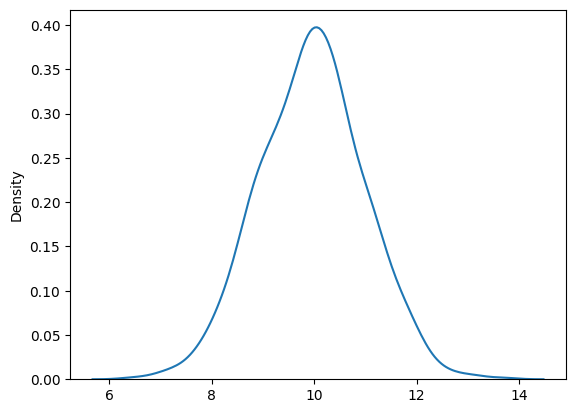

In [31]:
d = np.random.normal(10, 1, 1000)
sns.kdeplot(d)

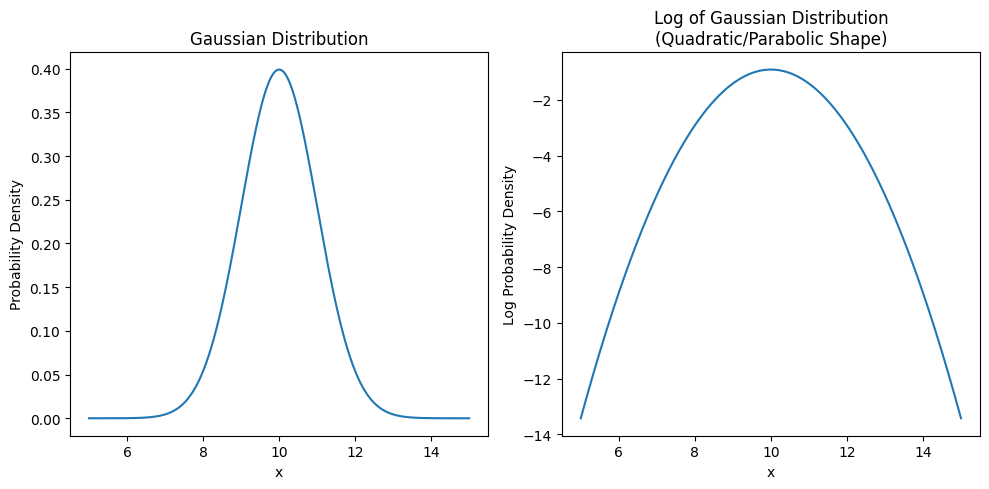

In [39]:
# Create data for a Gaussian distribution
x = np.linspace(5, 15, 1000)
mu, sigma = 10, 1
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
    -((x - mu) ** 2) / (2 * sigma**2)
)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Normal distribution
ax1.plot(x, gaussian)
ax1.set_title("Gaussian Distribution")
ax1.set_xlabel("x")
ax1.set_ylabel("Probability Density")

# Plot 2: Log of the normal distribution (showing the quadratic/parabolic shape)
log_gaussian = np.log(gaussian)
ax2.plot(x, log_gaussian)
ax2.set_title("Log of Gaussian Distribution\n(Quadratic/Parabolic Shape)")
ax2.set_xlabel("x")
ax2.set_ylabel("Log Probability Density")

plt.tight_layout()
plt.show()


# second pass


In [40]:
def sim_globe(p, N):
    return np.random.choice(["W", "L"], N, p=[p, 1 - p])

In [41]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [44]:
def compute_posterior(sample, p=np.linspace(0, 1, 5)):
    # posterior is proportional to likelihood times prior
    total_ways = 1  # big number, but it cancels out - im not explicitly computing it here, so setting as 1
    prior = 1 / len(p)  # this cancels out too
    # this is same as the biomial distribution, from which we can get the answer directly
    likelihood = (
        (p ** sum(sample == "W")) * ((1 - p) ** sum(sample == "L"))
    ) / total_ways

    un_normalised_posterior = likelihood * prior
    # the posterior probability, is this normalised over all possible outcomes - this is bayes theorem
    total_probability = prior * (sum(likelihood) / total_ways)
    posterior = un_normalised_posterior / total_probability
    return posterior

In [49]:
p = np.linspace(0, 1, 5)
res = compute_posterior(
    sim_globe(0.5, 100),
    p=p,
)
res, sum(res)

(array([0.00000000e+00, 1.37597227e-04, 9.99862400e-01, 2.33022111e-09,
        0.00000000e+00]),
 1.0)

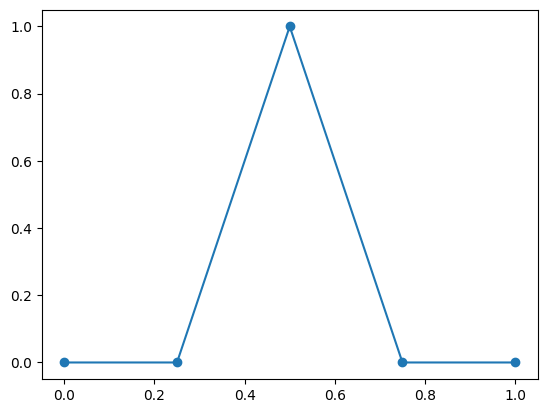

In [73]:
def show(data, p):
    plt.bar(range(len(data)), data)
    plt.xticks(range(len(data)), p)


p = np.linspace(0, 1, 5)
posterior = compute_posterior(
    sim_globe(0.5, 100),
    p=p,
)
# show(
#     compute_posterior(
#         sim_globe(0.5, 100),
#         p=p,
#     ),
#     p=p,
# )
plt.plot(p, posterior, "-o")

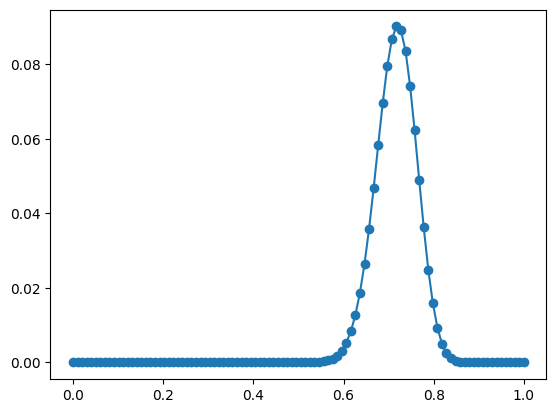

In [78]:
# as we consider more probabilities, the posterior will be more spread out over them
p = np.linspace(0, 1, 100)

posterior = compute_posterior(
    sim_globe(0.8, 100),
    p=p,
)
# show(
#     posterior,
#     p=p,
# )
# sns.histplot(posterior)
plt.plot(p, posterior, "-o")


# homework continued


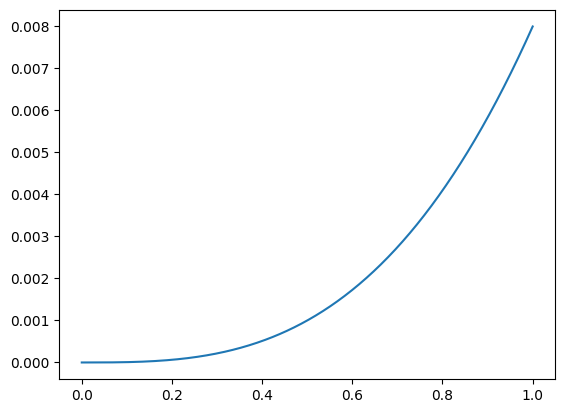

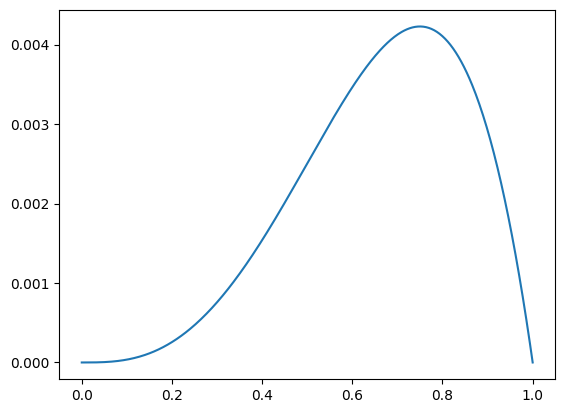

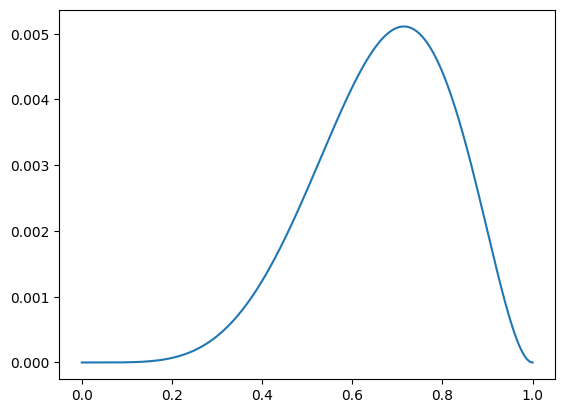

In [88]:
# 2m1
p = np.linspace(0, 1, 500)

inputs = [
    np.array(list("WWW")),
    np.array(list("WWWL")),
    np.array(list("LWWLWWW")),
]

for inp in inputs:
    posterior = compute_posterior(inp, p=p)
    plt.plot(p, posterior)
    # show(posterior, p=p)
    plt.show()


In [82]:
np.array([True, False]).astype(int)

array([1, 0])

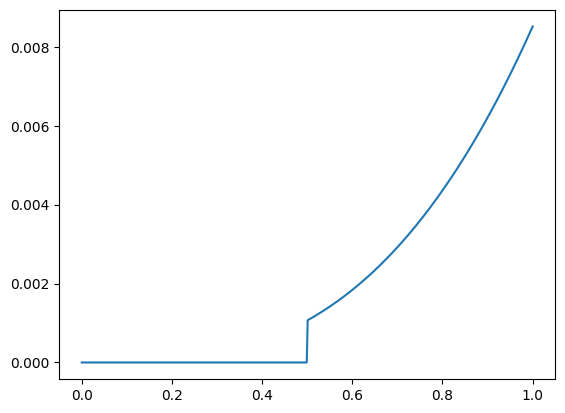

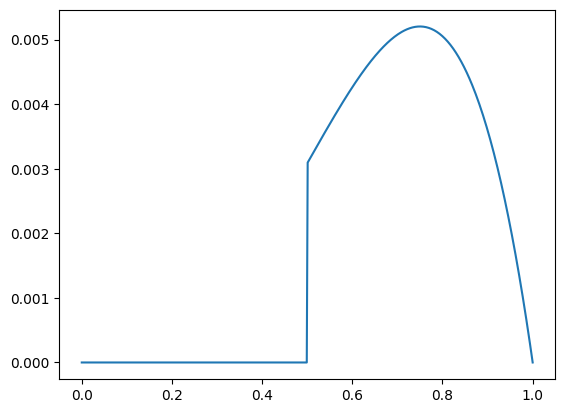

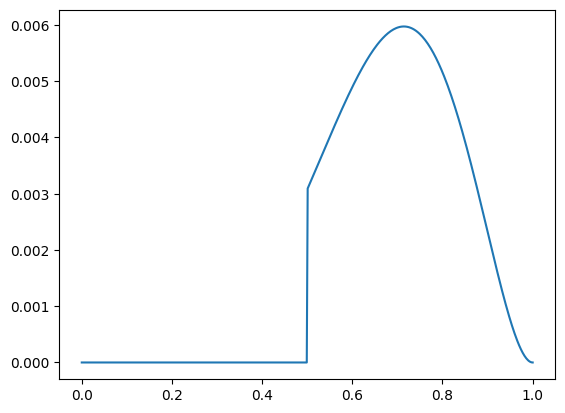

In [90]:
# 2m2

p = np.linspace(0, 1, 500)

inputs = [
    np.array(list("WWW")),
    np.array(list("WWWL")),
    np.array(list("LWWLWWW")),
]

for inp in inputs:
    total_ways = 1  # dummy since it is cancelled out
    prior = (p >= 0.5).astype(int)
    likelihood = (p ** sum(inp == "W")) * ((1 - p) ** sum(inp == "L")) / total_ways
    un_norm_posterior = likelihood * prior
    # this prior embeds the info that its not possible for p<0.5
    # priors in the denominator are diff, so cant factor it out
    posterior = un_norm_posterior / (sum(likelihood * prior))
    # show(posterior, p=p)
    plt.plot(p, posterior)
    plt.show()


In [94]:
# 2m3
# earth and mars equally likely
priors = np.array([0.5, 0.5])
p_land = np.array([0.3, 1.0])
# likelihood = p_land[0]
posterior = (p_land[0] * priors[0]) / (sum(p_land * priors))
print(posterior)

print(np.isclose(posterior, 0.23, rtol=1e-2))

0.23076923076923075
True


In [97]:
# 2h1
(0.1**2) * 0.69 + (0.2**2) * 0.31

0.019300000000000005

In [98]:
(0.1 * 0.69) / ((0.1 * 0.69) + (0.2 * 0.31))

0.5267175572519083

In [99]:
(0.9 * 0.526) / ((0.9 * 0.69) + (0.8 * 0.31))

0.5447640966628309

In [96]:
# 2h3
(0.9 * 2) / (1.7 * 3)

0.35294117647058826

# ch3 (in the book) - sampling


In [101]:
from scipy.stats import binom

In [104]:
binom.pmf(k=4, n=10, p=[0.5, 0.6])


array([0.20507812, 0.11147674])

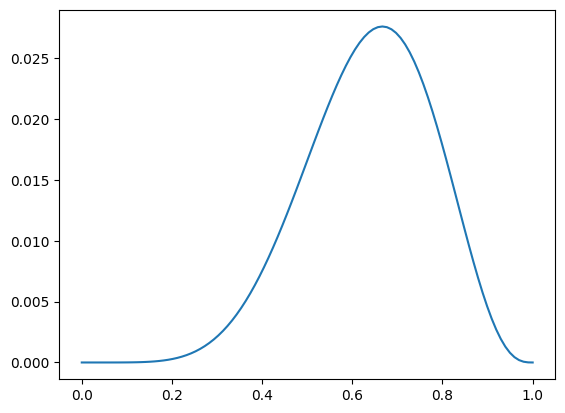

In [105]:
p = np.linspace(0, 1, 100)

num_water = 6
num_total = 9

prior = np.ones_like(p)
likelihood = binom.pmf(k=num_water, n=num_total, p=p)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

plt.plot(p, posterior)

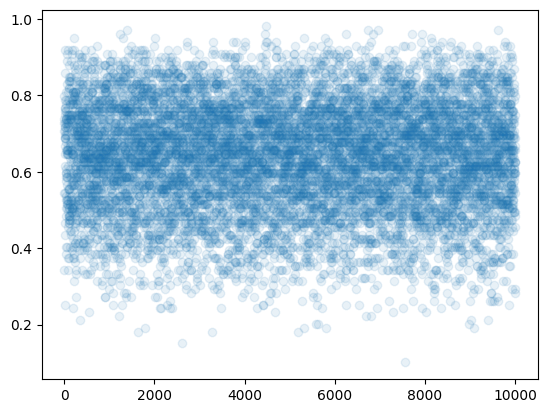

<Axes: ylabel='Density'>

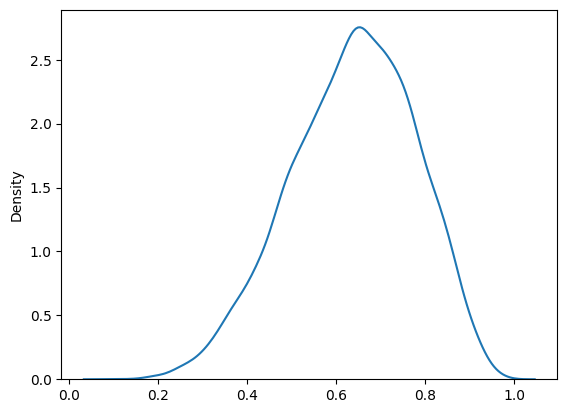

In [111]:
# sample parameters from the posterior, in proportion to their probability
# this code samples the parameters (p) according to their posterior probability
samples = np.random.choice(p, size=10000, p=posterior)
plt.scatter(range(len(samples)), samples, alpha=0.1)
plt.show()
sns.kdeplot(samples)


we'll be using samples, because ofthen, samples from the posterior is all that we'll have. we won't have the true posterior formulation


### intervals of defined boundaries


> posterior probability that the proportion of water is less than 0.5


In [115]:
# using the posterior directly
# posterior has probabilities, and p is the parameter (not probability)
print(sum(posterior[p < 0.5]))
# using samples - these are just samples of the parameter p, with frequencies of occurance in proportion to their probability
print(sum(samples < 0.5) / len(samples))

0.1718331311074747
0.1737


### intervals of defined mass


In [116]:
# 80% of probability mass lies below this number
# the area under whole curve is 1, but area under curve from 1-0.75 is 0.8.
np.quantile(samples, 0.8)

0.759595959595967

In [118]:
# middle 80% bounds
# this is called a percentile interval. there is equal probability mass at the tails
np.quantile(samples, [0.1, 0.9])

array([0.44444444, 0.81818182])

In [119]:
# we also have a 'highest posterior density interval'
# this is the narrowest interval having the specified prob mass

In [120]:
from scipy.stats import gaussian_kde

# Fit a KDE to the samples to get a continuous density estimate
kde = gaussian_kde(samples)


# Function to find the HPD interval
def hpd_interval(samples, alpha=0.2):  # alpha=0.2 for 80% interval
    # Sort samples
    sorted_samples = np.sort(samples)
    n = len(sorted_samples)
    # since we have samples, not probabilities, we are looking for this interval width
    # for (1-alpha)% of the density
    interval_size = int(np.floor(n * (1 - alpha)))

    # Find the interval with minimum width
    intervals = np.array(
        [sorted_samples[i : i + interval_size] for i in range(n - interval_size + 1)]
    )
    widths = intervals[:, -1] - intervals[:, 0]
    best_idx = np.argmin(widths)

    return intervals[best_idx][0], intervals[best_idx][-1]


# Calculate 80% HPD interval
hpd_lower, hpd_upper = hpd_interval(samples)
print(f"80% HPD interval: ({hpd_lower:.3f}, {hpd_upper:.3f})")


80% HPD interval: (0.455, 0.818)


The intervals are similar (percentile intervals and the hdpi) - but only are different and matter more when you have very skewed posterior distributions.


when reporting point estimates, you can choose a loss function, which gives importance to diff things - for example, the absolute difference nominates the median, the squared difference nominates the mean.

Though, a point estimate is usually not needed - the distribution is sufficient


## sampling posterior distribution

to see what the implied observations from the model is.


In [122]:
binom.pmf(k=[0, 1, 2], n=2, p=0.7)

array([0.09, 0.42, 0.49])

In [177]:
# Take samples from binomial distribution
# for any unique value of p (the parameter=0.7), there is a unique pattern of observations that it implies
# in this case, it's this particular binomial distribution
# there is uncertainty in the predicted/implied observations (the dist in this case)
# because even if p is fixed, the obs produced can vary
# this is the distribution of the number of experiments which were a success
samples = binom.rvs(n=9, p=0.9, size=100)
samples

array([8, 7, 8, 7, 9, 9, 9, 8, 7, 8, 7, 6, 8, 7, 8, 8, 9, 9, 7, 8, 9, 8,
       9, 9, 8, 9, 9, 8, 9, 8, 8, 9, 9, 9, 8, 8, 7, 5, 8, 9, 8, 8, 8, 9,
       9, 7, 7, 8, 9, 8, 8, 9, 8, 8, 8, 8, 9, 8, 8, 9, 9, 8, 9, 7, 9, 9,
       8, 9, 8, 9, 9, 9, 8, 8, 9, 8, 8, 6, 8, 6, 8, 9, 8, 9, 9, 9, 6, 7,
       8, 9, 9, 7, 8, 9, 8, 8, 7, 9, 9, 6])

when you compute the sampling distribution of all the outcomes for each p, then average these outcomes weighted by the posterior probability of p, then you get the posterior predictive distribution.


with the simulated samples, you can compare the distribution of second order questions - for example, distribution of number of times there was a switch from land to water and vice versa, and see if it lines up with the observations.


# homework - chapter3


In [181]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones_like(p_grid)
likelihood = binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)
samples = np.random.choice(p_grid, 10000, replace=True, p=posterior)

<Axes: ylabel='Density'>

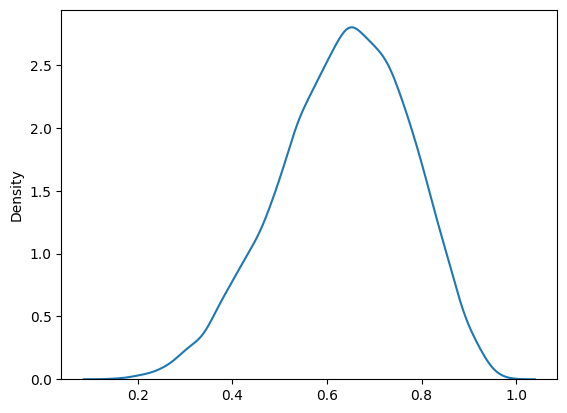

In [182]:
sns.kdeplot(samples)

In [183]:
n = len(samples)
print(sum(samples < 0.2) / n)

0.0007


In [187]:
np.quantile(samples, 0.2)

0.5195195195195195

In [188]:
np.quantile(samples, 0.8)

0.7577577577577578

In [189]:
hpd_interval(samples, alpha=1 - 0.66)

(0.5175175175175175, 0.7837837837837838)

In [190]:
# percentile interval
x = (1 - 0.66) / 2
np.quantile(samples, x), np.quantile(samples, 0.66 + x)

(0.4994994994994995, 0.7717717717717718)

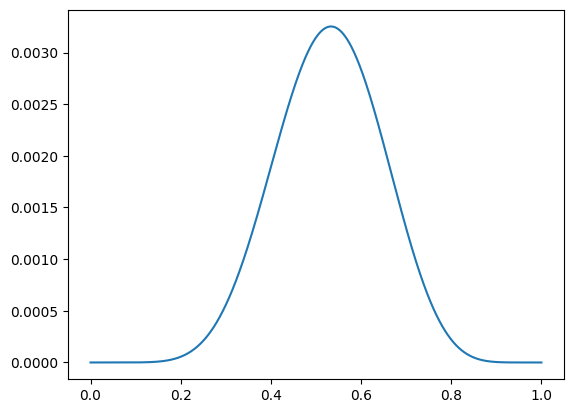

In [191]:
# 3m1
posterior = binom.pmf(k=8, n=15, p=p_grid)
posterior = posterior / sum(posterior)
plt.plot(p_grid, posterior)

In [193]:
samples = np.random.choice(p_grid, 10000, replace=True, p=posterior)
hpd_interval(samples, 1 - 0.9)

(0.34234234234234234, 0.7317317317317317)

In [221]:
obs_distribution = binom.rvs(n=15, p=samples)

<Axes: ylabel='Density'>

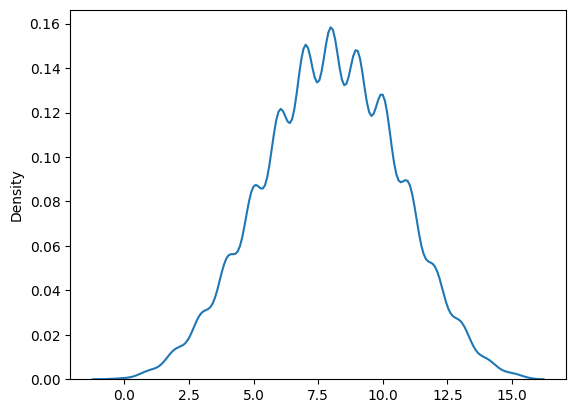

In [222]:
sns.kdeplot(obs_distribution)

In [223]:
sum(obs_distribution == 8) / len(obs_distribution)

0.1481

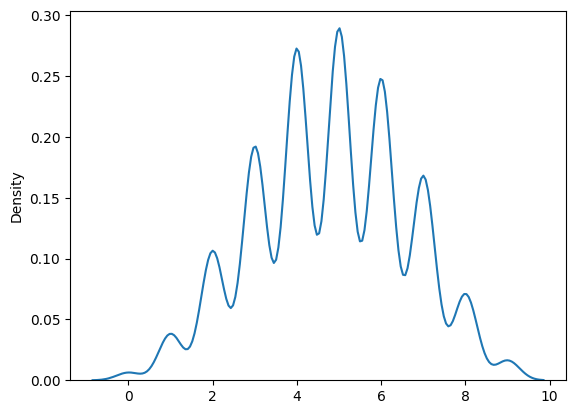

0.1761

In [224]:
# 3m4
obs_distribution = binom.rvs(n=9, p=samples)
sns.kdeplot(obs_distribution)
plt.show()
sum(obs_distribution == 6) / len(obs_distribution)

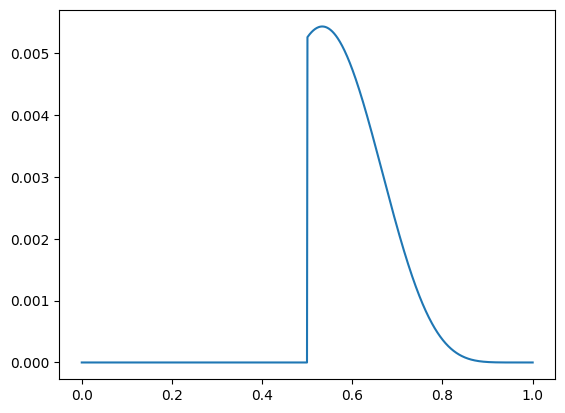

(0.5005005005005005, 0.7117117117117117)
0.1583
0.2235


In [230]:
# 3m5
prior = (p_grid >= 0.5).astype(int)
posterior = binom.pmf(k=8, n=15, p=p_grid) * prior
posterior = posterior / sum(posterior)
plt.plot(p_grid, posterior)
plt.show()
samples = np.random.choice(p_grid, 10000, replace=True, p=posterior)
print(hpd_interval(samples, 1 - 0.9))
obs_distribution = binom.rvs(n=15, p=samples)
print(sum(obs_distribution == 8) / len(obs_distribution))
obs_distribution = binom.rvs(n=9, p=samples)
print(sum(obs_distribution == 6) / len(obs_distribution))


In [232]:
# fmt: off
birth1 = [1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1]
birth2=[0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0]
# fmt: on


In [233]:
sum(birth1 + birth2)

111

In [240]:
agg = birth1 + birth2

0.5545545545545546


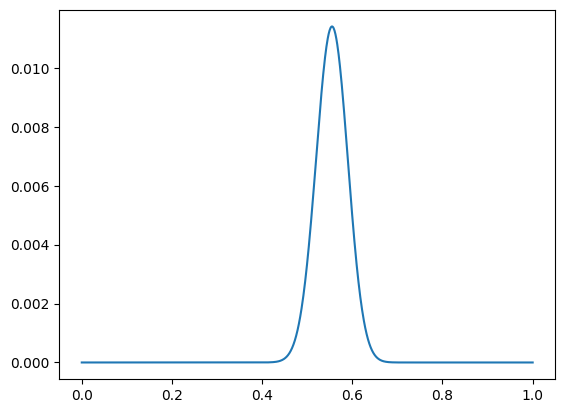

In [285]:
# 3h1
p_grid = np.linspace(0, 1, 1000)  # probabilities of having a boy
prior = np.ones_like(p_grid)
# count the number of ways the number of boys in observation is possible
likelihood = (p_grid ** sum(agg)) * ((1 - p_grid) ** (len(agg) - sum(agg)))
# alternatively, use the binomial distribution to count - 'success' is boy, 'failure' is girl
likelihood = binom.pmf(k=sum(agg), n=len(agg), p=p_grid)
# compute and normalise posterior
posterior = likelihood * prior
posterior = posterior / sum(posterior)
plt.plot(p_grid, posterior)
# the probability of having a boy that maximises the posterior
print(p_grid[np.argmax(posterior)])

(0.5315315315315315, 0.5775775775775776)
(0.4974974974974975, 0.6076076076076076)
(0.4744744744744745, 0.6226226226226226)


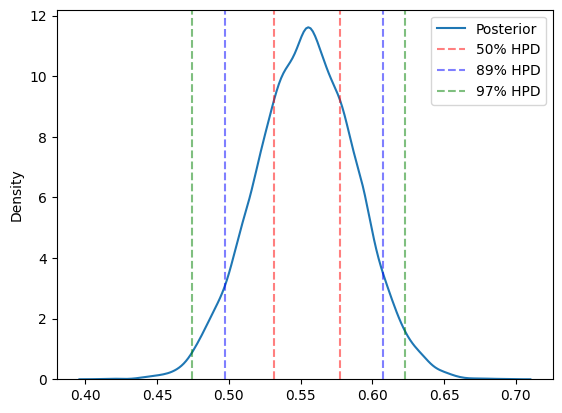

In [286]:
# 3h2
# sample p values according to posterior probability
samples = np.random.choice(p_grid, 10_000, p=posterior)
interval_50 = hpd_interval(samples, alpha=1 - 0.5)
interval_89 = hpd_interval(samples, alpha=1 - 0.89)
interval_97 = hpd_interval(samples, alpha=1 - 0.97)

print(interval_50)
print(interval_89)
print(interval_97)

ax = sns.kdeplot(samples, label="Posterior")
ax.axvline(interval_50[0], color="red", linestyle="--", alpha=0.5, label="50% HPD")
ax.axvline(interval_50[1], color="red", linestyle="--", alpha=0.5)
ax.axvline(interval_89[0], color="blue", linestyle="--", alpha=0.5, label="89% HPD")
ax.axvline(interval_89[1], color="blue", linestyle="--", alpha=0.5)
ax.axvline(interval_97[0], color="green", linestyle="--", alpha=0.5, label="97% HPD")
ax.axvline(interval_97[1], color="green", linestyle="--", alpha=0.5)
ax.legend()

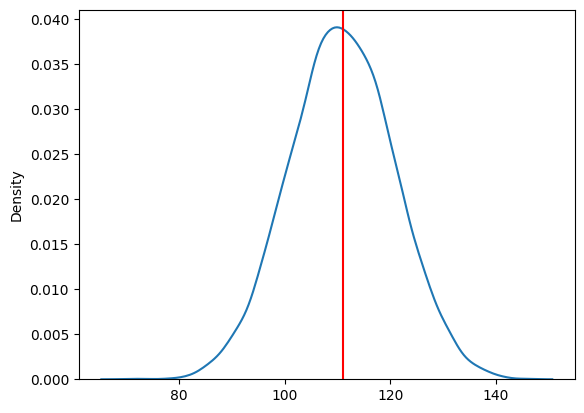

In [287]:
# each sample here is a count of boys out of 200 births
samples2 = binom.rvs(n=len(agg), p=samples)

sns.kdeplot(samples2)
plt.axvline(sum(agg), c="r")

# yeah, the distribution seems to have the observation as the central tendency

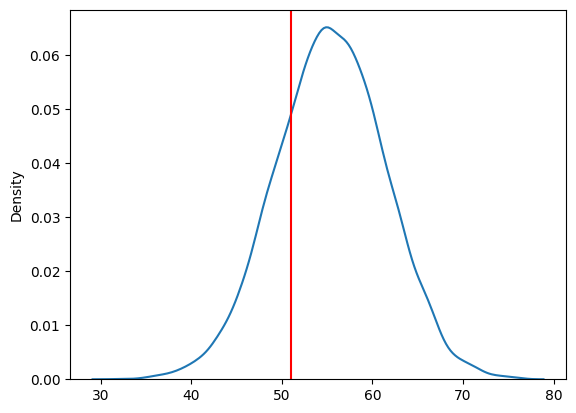

In [288]:
samples2 = binom.rvs(n=len(birth1), p=samples)

sns.kdeplot(samples2)
plt.axvline(sum(birth1), c="r")

# ooo! the model fit the aggregated births, but seems
# like it overestimates the number of boys born as the first child
# the central tendency is higher than the observation

In [289]:
birth1 == 0

False

> The code below is wrong for 3h5 - we have to use the previous model, not train a new one


In [282]:
# birth_subset = np.array(birth2)[np.array(birth1) == 0]

# prior = np.ones_like(p_grid)
# likelihood = binom.pmf(k=sum(birth_subset), n=len(birth_subset), p=p_grid)
# posterior = likelihood * prior
# posterior = posterior / sum(posterior)

# plt.plot(p_grid, posterior)

In [283]:
# samples3 = np.random.choice(p_grid, 10_000, p=posterior)
# samples_4 = binom.rvs(n=len(birth_subset), p=samples3)

# sns.kdeplot(samples2, label="agg dist of boys expected")
# sns.kdeplot(samples_4, label="dist of boys after female child")
# plt.legend()

# # seems like you get less boys after a female child

In [284]:
# sns.kdeplot(samples2 - samples_4)
# plt.title("distribution of the difference")
# plt.axvline(0, c="grey")

# updated


In [290]:
birth_subset = np.array(birth2)[np.array(birth1) == 0]

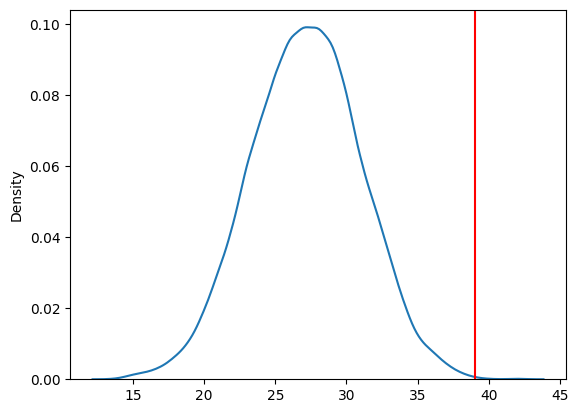

In [295]:
# notice, its the same samples from the initial model that looks at aggregated data
# not a new model fit.
subset_samples = binom.rvs(n=len(birth_subset), p=samples)
sns.kdeplot(subset_samples)
plt.axvline(sum(birth_subset), c="r")

# the observed number of boys the model predicts for births following girls seems bad
#  maybe, the first and second births are not independant